# *Research on Keyword using Twitter Data*
# Wenqing Ling            SUID: 845420040
# GuoXing Yao             SUID: 650670937
# Sizhe Zheng              SUID: 941228736

# 1.tweepy

# Seems tweepy package still not fix with python 3.7
# Here I'm using python 3.6.6 and upgrage the tweepy to the leatest version by 
# using the following command on Anaconda Prompt:
# pip3 install --upgrade git+https://github.com/tweepy/tweepy.git

In [1]:
# scrape raw data from Twitter by giving authorization key pairs

# from tweepy import Stream
# from tweepy import OAuthHandler
# from tweepy.streaming import StreamListener
# from __future__ import absolute_import, print_function

# comsumer_key = 'WVtv2RK0lKcEpc4bjW7ZX276r'
# comsumer_secret = 'PYdmwbf55hthHHcBGUNKTwoDDLeXlJITGaOV3shtCgOIjNZexb'
# access_token = '2762799427-LfgXdY7CWUVlfVbkh9idPdPKOc2rgbVVNwOxc4k'
# access_token_secret = '6UC2FHDR2MfLZiz6AFNWlWf597us79nOYmtLlJhj06shH'

# class StdOutListener(StreamListener):
#    def on_data(self,data):
#        try:
#            print(self,data)
#            with open('TwitterAPI.csv', 'a') as f:
#                f.write(data)
#        except:
#            pass
       
#    def on_error(self,status):
#        print(status)
        
# l = StdOutListener()
# auth = OAuthHandler(comsumer_key, comsumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# stream = Stream(auth, l)
# stream.filter(track=['iphone xs', 'ipad pro', 'macbook air'])

In [2]:
# import all required packages for our project

import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import datetime
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from tkinter import *
import numpy as np
import collections
from textblob import TextBlob

from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree


from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier





C:\Users\guoxingyao\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 2. Data Mining

In [2]:
# load raw data from TwitterAPI.csv file


tweets_data_path = 'TwitterAPI.csv'
#tweets_data_path = 'TwitterTest.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
# Test Purpose: ensure data is loaded
# print (len(tweets_data))


186623


# Tweets by language

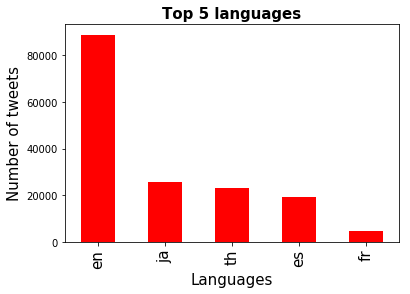

In [3]:
# generate dictionary for top 5 languages

# extract attributes of text, language and country
tweets = pd.DataFrame()
tweets['text'] = [x.get('text', None) for x in tweets_data]
tweets['lang'] = [x.get('lang', None) for x in tweets_data]
tweets['country'] = [x.get('place').get('country', None) if x.get('place', None) != None else None for x in tweets_data]

# plot frequency by language
tweets_by_lang = tweets['lang'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
#plt.savefig('top5Lang.png')
plt.show()



In [5]:
# test purpose: display the top 10 languages
tweets_by_lang[:10]

en     88743
ja     25851
th     23264
es     19186
fr      4579
in      3929
pt      3853
und     3357
ar      3015
ru      2940
Name: lang, dtype: int64

# Tweets by country
# 4th is '日本'(Japan) and not display correctly 

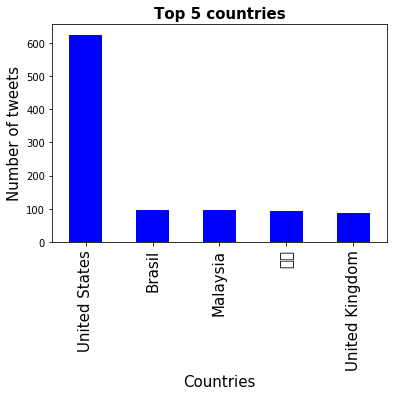

In [4]:
# generate distribution by country

tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')
#plt.savefig('top5Country.png')
plt.show()

In [6]:
# test purpose: display tweets from the top 10 countries
tweets_by_country[:10]

United States                  625
Brasil                          97
Malaysia                        95
日本                              92
United Kingdom                  88
Nigeria                         63
Canada                          58
France                          49
España                          48
Republic of the Philippines     27
Name: country, dtype: int64

# Rank

84587
32968
8608


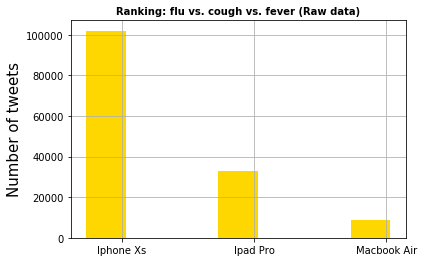

In [102]:
# Helper function: check keyword existence inside the tweets text content
def check(x, matchWord):
    if x is None:
        return False
    text = x.lower()
    if (matchWord in text):
        return True
    else:
        return False

# filter raw data by keeping tuples with keywords of {iphone xs, ipad pro, macbook air} 

tweets['iphone xs'] = tweets['text'].apply(lambda x: check(x, 'iphone xs'))
tweets['ipad pro'] = tweets['text'].apply(lambda x: check(x, 'ipad pro'))
tweets['macbook air'] = tweets['text'].apply(lambda x: check(x, 'macbook air'))
print(tweets['iphone xs'].value_counts()[True])
print(tweets['ipad pro'].value_counts()[True])
print(tweets['macbook air'].value_counts()[True])

# plot distribution in histogram picture below

prg_langs = ['Iphone Xs', 'Ipad Pro', 'Macbook Air']
tweets_by_prg_lang = [tweets['iphone xs'].value_counts()[False], tweets['ipad pro'].value_counts()[True], tweets['macbook air'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.3
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='gold')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: flu vs. cough vs. fever (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()
#plt.savefig('rank.png')
plt.show()

# 3.Geology Time Analysis

In [198]:
# helper function: filter data by removing irrelevant attributes, keeping time of creating tweets, language, location and text

def dataClean(fileName):
    tweets_data = []
    tweets_file = open(fileName, "r")
    count = 0
    for line in tweets_file:
        try:
            temp = json.loads(line)
            if 'iPhone' in temp['text']:
                continue
            tweet = {}
            #tweet['geo'] = temp['geo']
            #tweet['id'] = temp['id']
            #tweet['place'] = temp['place']
            tweet['text'] = temp['text']
            #Tweet stream problem. Can't find the key 'location'
            tweet['location'] = temp['place']
            tweet['timestamp_ms'] = temp['timestamp_ms']
            tweet['lang'] = temp['lang']
            tweets_data.append(tweet)
            count += 1
        except:
            continue
    print(len(tweets_data))
    print(count)
    return tweets_data

# helper function: count tweets data after data cleaning
def dataCount(path):
    tweets_file = open(path, 'r')
    count = 0
    for line in tweets_file:
        try:
            t = json.loads(line)
            if "location" in t:
                count += 1
        except:
            continue
    print(count)


# helper function:write data after data cleaning
def write_file(data, fileName):
    with open(fileName, 'w') as outfile:
        for val in data:
            json.dump(val, outfile)
            outfile.write('\n')

# Geo Analysis

# Source code from matplotlib's github
# https://github.com/matplotlib/basemap/blob/decfa95124dab76499734145d03b002b9db27477/examples/fillstates.py

206243
New Jersey 1811
Rhode Island 200
Massachusetts 1639
Connecticut 775
Maryland 1470
New York 6396
Delaware 108
Florida 4760
Ohio 2758
Pennsylvania 2593
Illinois 2862
California 16744
Hawaii 325
Virginia 1724
Michigan 2185
Indiana 1475
North Carolina 1325
Georgia 2504
Tennessee 1338
New Hampshire 245
South Carolina 716
Louisiana 1338
Kentucky 559
Wisconsin 931
Washington 1251
Alabama 804
Missouri 775
Texas 8303
West Virginia 426
Vermont 112
Minnesota 945
Mississippi 540
Iowa 470
Arkansas 548
Oklahoma 721
Arizona 1888
Colorado 1033
Maine 244
Oregon 1340
Kansas 438
Utah 367
Nebraska 228
Nevada 1317
Idaho 299
New Mexico 366
South Dakota 87
North Dakota 100
Montana 108
Wyoming 40
Alaska 200
geo tweets: 79731


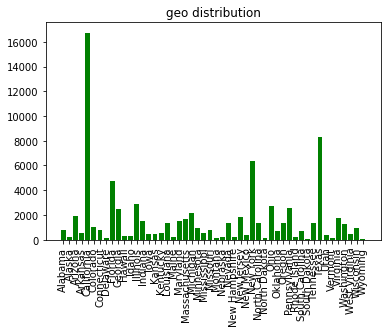

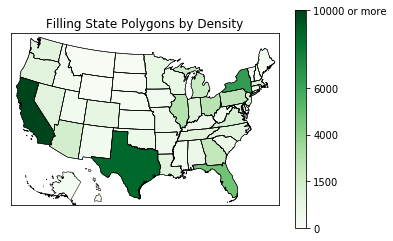

In [204]:
# helper function: read json data, the cleaning data    
def readData(file):
    tweets_data = []
    tweets_file = open(file, 'r')
    for line in tweets_file:
        try:
            t = json.loads(line)
            tweets_data.append(t)
        except:
            continue
    print(len(tweets_data))
    return tweets_data

# helper function: plot tweets distribution of tweets density by US state
def plotGeo(stateDict):
    # Lambert Conformal map of lower 48 states.
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    # draw state boundaries.
    shp_info = m.readshapefile('./st99_d00','states',drawbounds=True)
    # choose a color for each state based on population density.
    colors={}
    statenames=[]
    cmap = plt.cm.Greens # use 'hot' colormap
    # cmap = plt.cm.coolwarm
    vmin = 0; vmax = 14000 # set range.

    for shapedict in m.states_info:
        statename = shapedict['NAME']
        # skip DC and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico']:
            pop = stateDict[statename]
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            # colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
            colors[statename] = cmap(pop * 1.5/ vmax)[:3]
        statenames.append(statename)
    # cycle through state names, color each one.
    ax = plt.gca() # get current axes instance
    ATOLL_CUTOFF = 0.005
    for ind,shapedict in enumerate(m.states_info):
        seg = m.states[int(shapedict['SHAPENUM'] - 1)]
        # skip DC and Puerto Rico.
        if statenames[ind] not in ['Puerto Rico', 'District of Columbia']:
        # Offset Alaska and Hawaii to the lower-left corner. 
            if statenames[ind] == 'Alaska':
            # Alaska is too big. Scale it down to 35% first, then transate it. 
                seg = list([(0.30*x_y[0] + 1100000, 0.30*x_y[1]-1300000) for x_y in seg])
            if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > ATOLL_CUTOFF:
                seg = list([(x_y1[0] + 5200000, x_y1[1]-1400000) for x_y1 in seg])

            color = rgb2hex(colors[statenames[ind]]) 
            poly = Polygon(seg,facecolor=color,edgecolor='black',linewidth=.5)
            ax.add_patch(poly)
    sm = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_ticks([0, 3000, 6000, 9000, 14000])
    cbar.set_ticklabels(['0', '1500', '4000', '6000', '10000 or more'])
    # cbar.set_ticklabels(['0', '200', '500', '1000', '3600'])
    plt.title('Filling State Polygons by Density')
    # plt.savefig('geoDistribution.png')
    plt.show()

# helper function: geological description data for each of US states
def getGeoDict(tweets):
    geoTweets = []
    geoDict = {
    'New Jersey':  438.00,
    'Rhode Island':   387.35,
    'Massachusetts':   312.68,
    'Connecticut':    271.40,
    'Maryland':   209.23,
    'New York':    155.18,
    'Delaware':    154.87,
    'Florida':     114.43,
    'Ohio':  107.05,
    'Pennsylvania':  105.80,
    'Illinois':    86.27,
    'California':  83.85,
    'Hawaii':  72.83,
    'Virginia':    69.03,
    'Michigan':    67.55,
    'Indiana':    65.46,
    'North Carolina':  63.80,
    'Georgia':     54.59,
    'Tennessee':   53.29,
    'New Hampshire':   53.20,
    'South Carolina':  51.45,
    'Louisiana':   39.61,
    'Kentucky':   39.28,
    'Wisconsin':  38.13,
    'Washington':  34.20,
    'Alabama':     33.84,
    'Missouri':    31.36,
    'Texas':   30.75,
    'West Virginia':   29.00,
    'Vermont':     25.41,
    'Minnesota':  23.86,
    'Mississippi':   23.42,
    'Iowa':  20.22,
    'Arkansas':    19.82,
    'Oklahoma':    19.40,
    'Arizona':     17.43,
    'Colorado':    16.01,
    'Maine':  15.95,
    'Oregon':  13.76,
    'Kansas':  12.69,
    'Utah':  10.50,
    'Nebraska':    8.60,
    'Nevada':  7.03,
    'Idaho':   6.04,
    'New Mexico':  5.79,
    'South Dakota':  3.84,
    'North Dakota':  3.59,
    'Montana':     2.39,
    'Wyoming':      1.96,
    'Alaska':     0.42}
    for key in geoDict:
        geoDict[key] = 0
    for tweet in tweets:
        if tweet['location']['country'] == "United States":
            if 'state' in tweet['location']:
                if tweet['location']['state'] in geoDict:
                    geoDict[tweet['location']['state']] += 1
                    geoTweets.append(tweet)
    return geoDict, geoTweets

# helper function:calculate the geological graph with tweets distribution information
def geoExp(dataPath = 'cleanData.json'):
    tweets = readData(dataPath)
    geoDict, geoTweets = getGeoDict(tweets)
    vmin = 0
    vmax = 0
    for key in geoDict:
        print(key, geoDict[key])
        if geoDict[key] > vmax:
            vmax = geoDict[key]
    # print vmax
    print('geo tweets:', np.sum([geoDict[key] for key in geoDict]))
    plotGeoDict(geoDict)
    plotGeo(geoDict)

# helper function: plot geological graph by tweets distribution by US state   
def plotGeoDict(dataDict):
    od = collections.OrderedDict(sorted(dataDict.items()))
    plt.bar(list(range(len(list(od.keys())))), list(od.values()), 0.8, color='g')
    plt.xticks(list(range(len(list(od.keys())))), list(od.keys()), rotation='vertical')
    plt.rc('xtick', labelsize=10)
    plt.title('geo distribution')
    # plt.savefig('geoDict.png')
    plt.show()
    
geoExp()

# Time Analysis

206243


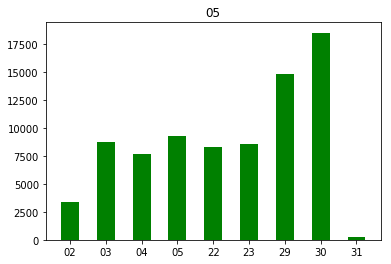

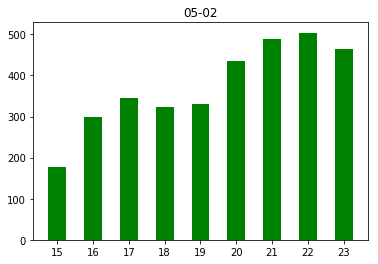

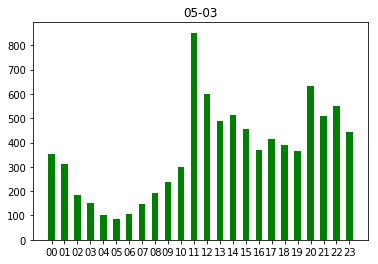

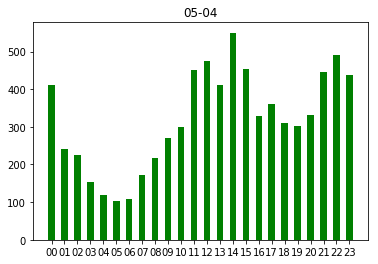

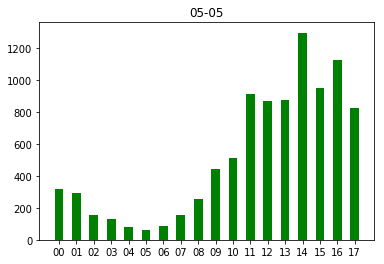

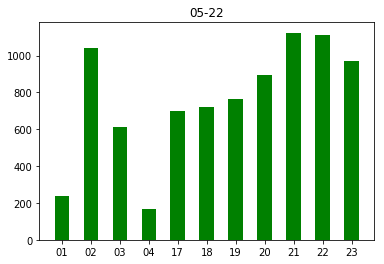

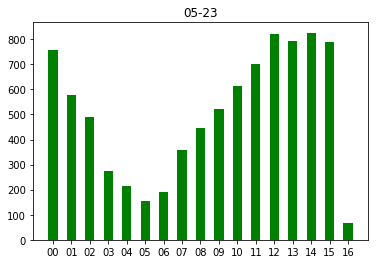

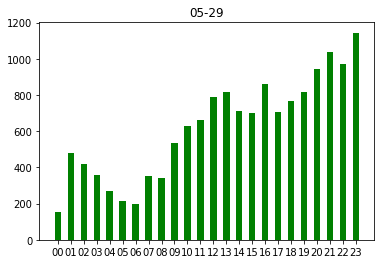

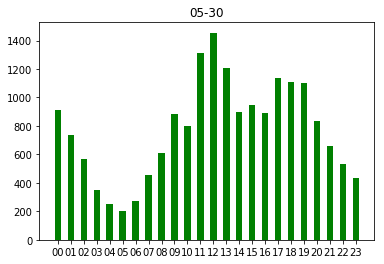

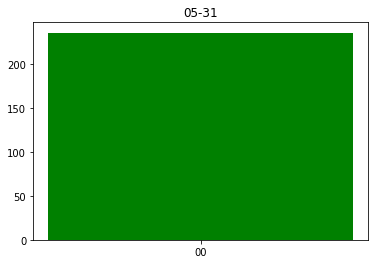

In [203]:
# helper function: load data and accumulate distribution by time intervals of date and hour
def getTimeDict(dataPath = 'cleanData.json'):
    tweets = readData(dataPath)
    geoDict, tweets = getGeoDict(tweets)
    dateDict = {}
    hourDict = {}
    for i in range(len(tweets)):
        date = datetime.datetime.fromtimestamp(int(tweets[i]['timestamp_ms']) / 1000).strftime('%m-%d')
        hour = datetime.datetime.fromtimestamp(int(tweets[i]['timestamp_ms']) / 1000).strftime('%m-%d-%H')
        if date in dateDict:
            dateDict[date] += 1
        else:
            dateDict[date] = 1
        if date not in hourDict:
            hourDict[date] = {}
            hourDict[date][hour] = 1
        else:
            if hour not in hourDict[date]:
                hourDict[date][hour] = 1
            else:
                hourDict[date][hour] += 1
    return dateDict, hourDict

# helper function:plot the time series for interval of date and hour
def plotTimeDict(dataDict):
    od = collections.OrderedDict(sorted(dataDict.items()))
    plt.bar(list(range(len(list(od.keys())))), list(od.values()), 0.5, color='g')
    plt.xticks(list(range(len(list(od.keys())))), [val[-2:] for val in list(od.keys())])
    plt.title(list(od.items())[0][0][:-3])
    # plt.savefig('date_'+od.items()[0][0][:-3]+'.png')
    plt.show()

# helper function: execute time series plot
def timeExp(dataPath = 'cleanData.json'):
    dateDict, hourDict = getTimeDict(dataPath)
    plotTimeDict(dateDict)
    for key in hourDict:
        plotTimeDict(hourDict[key])
        
timeExp()

# Sentiment Analysis

206243


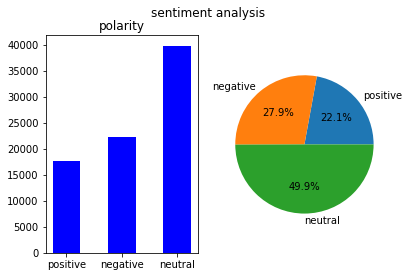

In [218]:
# helper function: perform sentiment analysis by accumulating data
def getSentDict(dataPath = 'cleanData.json'):
    tweets = readData(dataPath)
    geoDict, tweets = getGeoDict(tweets)
    sentDict = {'positive': 0, 'negative': 0,'neutral': 0 }

    for i in range(len(tweets)):
        testimonial = TextBlob(tweets[i]['text'])
        if testimonial.sentiment.polarity > 0.1:
            sentDict['positive'] += 1
        elif testimonial.sentiment.polarity < -0.1:
            sentDict['negative'] += 1
        else:
            sentDict['neutral'] += 1
    return sentDict

# helper function: plot sentiment distribution
def plotSentDict(sentDict):
    f, axarr = plt.subplots(1,2)
    axarr[0].bar(list(range(len(list(sentDict.keys())))), list(sentDict.values()), 0.5, color='blue')
    axarr[0].set_xticks(list(range(len(list(sentDict.keys())))))
    axarr[0].set_xticklabels(list(sentDict.keys()))
    axarr[0].set_title('polarity')
    axarr[1].pie([sentDict[key] for key in sentDict], labels=[key for key in sentDict], autopct='%1.1f%%')
    axarr[1].axis('equal')
    plt.suptitle('sentiment analysis')
    # plt.savefig('sentiment.png')
    plt.show()
    
# helper functin: call sentiment functions
def sentExp():
    sentDict = getSentDict()
    plotSentDict(sentDict)

    
sentExp()

In [3]:




# Helper function: read raw data, cleaning data, a bit different from previous one
# it accepts the path indicating file name


def getDataforDT(tweets_data_path = 'TwitterAPI.csv'):
    # helper variable 
    tweets_data = []
    tweets_file = open(tweets_data_path, "r")

    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
    
    # helper variables as dictionary
    count=0
    country=[]
    languages=[]
    preferences=[]
    
    # prepare preference values
    for i in range(len(tweets_data)):
        location = tweets_data[i].get('place')
        if location is not None :
            country.append(location['country_code'])
            languages.append(tweets_data[i].get('lang'))
            testimonial = TextBlob(tweets_data[i]['text'])
            if testimonial.sentiment.polarity > 0.1:
                preferences.append('positve')
            elif testimonial.sentiment.polarity < -0.1:
                preferences.append('negative')
            else:
                preferences.append('neutral')

    # prepare result data
#     print(len(country),len(preferences),len(languages))
    tweets = pd.DataFrame()
    tweets['country']=country
    tweets['lang']=languages
    tweets['preference']=preferences
    tweets.head()
    return tweets

tweets = getDataforDT()


# Decision Tree Analysis by relabeling
# need graphviz package

In [4]:
# There is an issue that when labeling categorial data, more columns are generate, 
# making the tree3.png not readable.




# helper function: accepts tweets data, rename and product dataframe
def DTLCleaning(tweets):
    data = pd.DataFrame()
    data['country'] = tweets['country']
    data['language'] = tweets['lang']
    data['preference'] = tweets['preference']
    return data

# helper function: generate decision tree image after relabeling
def DTL(data, img_name="decision_tree_relab.png"):
    clf = tree.DecisionTreeClassifier()
    one_hot_data = pd.get_dummies(data[['country','language']],drop_first=True)
    clf = clf.fit(one_hot_data, data['preference'])

    # Visualize data
    dot_data = tree.export_graphviz(clf,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]

    graph.write_png(img_name)

# call functions
data = DTLCleaning(tweets)
DTL(data,"decision_tree_relabel.png")

# Decision Tree Accuracy for Relabeling

In [5]:
# use cross validation to split data into test and train sets


#helper function:cross validation for decision tree after relabeling
def DTCVL(data):
    one_hot_data = pd.get_dummies(data[['country','language']],drop_first=True)
    x_train, x_test, y_train, y_test = train_test_split(one_hot_data, data['preference'], test_size=0.25, random_state=33)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train, y_train)
    y_predict = dtc.predict(x_test)


    # use classification report to show the accuracy, precisio, recall, f1-score

#     print(dtc.score(x_test, y_test))
    print(classification_report(y_predict, y_test,target_names=['positive','negative','neutral']))

    
DTCVL(data)

             precision    recall  f1-score   support

   positive       0.00      0.00      0.00         0
   negative       0.97      0.77      0.86       448
    neutral       0.09      0.39      0.14        18

avg / total       0.94      0.75      0.83       466



C:\Users\guoxingyao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Decision Tree Model by Factorizing

In [7]:




#helper function: convert data from category data to numeric data by factorizing, rather than relabel
def DTCCleaning():
    data = pd.DataFrame()
    data['country'] = pd.factorize(tweets['country'])[0]
    data['language'] = pd.factorize(tweets['lang'])[0]
    data['preference'] = tweets['preference']
    return data

# helper function: get decision tree img, data from factorizing
def DTC(md):
    clf = tree.DecisionTreeClassifier(max_depth=md)

#     one_hot_data = pd.get_dummies(data[['A','B']],drop_first=True)
    one_hot_data = DTCCleaning()
    clf = clf.fit(one_hot_data[['country','language']], one_hot_data['preference'])

    # Visualize data
    dot_data = tree.export_graphviz(clf,
                                    feature_names=['country','language'],
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    # colors = ('turquoise', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
    #         dest.set_fillcolor(colors[i])

    graph.write_png("dt.factorization.png")
    
    
#call the DTC method
# DTC(tweets,"decision_tree_0.png")
# helper function to call tkinder to input values
def inputTK():
    def show_entry_fields():
        print("Max Depth: %s\nFile Name: %s" % (e1.get(), e2.get()))
        DTC(int(e1.get()))
    
    
    master = Tk()
    master.title("Input max depth and file name")
    Label(master, text="Max Depth ").grid(row=0)
    Label(master, text="File Name").grid(row=1)

    e1 = Entry(master)
    e2 = Entry(master)

    e1.grid(row=0, column=1)
    e2.grid(row=1, column=1)

    Button(master, text='Quit', command=master.destroy).grid(row=3, column=0, sticky=W, pady=4)
    Button(master, text='Go', command=show_entry_fields).grid(row=3, column=1, sticky=W, pady=4)

    mainloop()

inputTK()


Max Depth: 3
File Name: dt0.png


# Decision Tree cross validation by Factorizing

In [11]:
# use cross validation to split data into test and train sets


# helper function: perform decision tree cross validation by factorized data 
def DTCVF():
    data = DTCCleaning()
    x_train, x_test, y_train, y_test = train_test_split(data[['country','language']], data['preference'], test_size=0.25, random_state=33)

    dtc = DecisionTreeClassifier()

    dtc.fit(x_train, y_train)
    y_predict = dtc.predict(x_test)


    # use classification report to show the accuracy, precisio, recall, f1-score

    print(dtc.score(x_test, y_test))
    print(classification_report(y_predict, y_test,target_names=['positive','negative','neutral']))
    
DTCVF()

0.7424892703862661
             precision    recall  f1-score   support

   positive       0.00      0.00      0.00         3
   negative       0.96      0.76      0.85       444
    neutral       0.09      0.37      0.14        19

avg / total       0.92      0.74      0.82       466



# Linear Classifier Model and its cross validation result

In [13]:



# helper function: use SGD Classifier to predict their preferences. It is based on relabeling data set
def DTCV(data):
    x_train, x_test, y_train, y_test = train_test_split(data[['country','language']],data['preference'],test_size=0.25, random_state=33)
    lr = LogisticRegression()
    sgdc = SGDClassifier()
    lr.fit(x_train, y_train)
    lr_y_predict = lr.predict(x_test)
    sgdc.fit(x_train, y_train)
    sgdc_y_predict= sgdc.predict(x_test)
    print('Linear Classifier with Encoding Accuracy')
    print(classification_report(y_test,lr_y_predict, target_names=['positive','negative','neutral']))


data = DTCCleaning()
DTCV(data)


Linear Classifier with Encoding Accuracy
             precision    recall  f1-score   support

   positive       0.00      0.00      0.00        34
   negative       0.76      1.00      0.86       352
    neutral       0.00      0.00      0.00        80

avg / total       0.57      0.76      0.65       466



C:\Users\guoxingyao\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\guoxingyao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
